In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [69]:
Bank_cust = pd.read_excel('Bank_churn_II.xlsx')
Bank_account = pd.read_excel('Bank_churn_II.xlsx', sheet_name = 'Customer_Info (2)')
Comb_df = pd.merge(Bank_cust,Bank_account, on = 'CustomerId', how='left')
Comb_df

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure_x,IsActiveMember,Exited,Surname,CreditScore,Geography,Gender,Age,Tenure_y,EstimatedSalary
0,15634602,0,1,Yes,2,Yes,1,Hargrave,619,FRA,Female,42.0,2,101348
1,15634602,0,1,Yes,2,Yes,1,Hargrave,619,FRA,Female,42.0,2,101348
2,15619304,159660,3,No,8,No,1,Onio,502,French,Female,42.0,8,113931
3,15701354,0,2,No,1,No,0,Boni,699,FRA,Female,39.0,1,93826
4,15737888,125510,1,Yes,2,Yes,0,Mitchell,850,Spain,Female,43.0,2,79084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9998,15682355,75075,2,No,3,No,1,Sabbatini,772,Germany,Male,42.0,3,92888
9999,15628319,130142,1,No,4,No,0,Walker,792,French,Female,28.0,4,38190
10000,15628319,130142,1,No,4,No,0,Walker,792,French,Female,28.0,4,38190
10001,15628319,130142,1,No,4,No,0,Walker,792,French,Female,28.0,4,38190


## Data exploration

In [172]:
Comb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9996 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerId          9996 non-null   int64 
 1   Balance             9996 non-null   int64 
 2   NumOfProducts       9996 non-null   int64 
 3   HasCrCard           9996 non-null   int64 
 4   Tenure_x            9996 non-null   int64 
 5   IsActiveMember      9996 non-null   int64 
 6   Exited              9996 non-null   int64 
 7   CreditScore         9996 non-null   int64 
 8   Geography           9996 non-null   object
 9   Gender              9996 non-null   object
 10  Age                 9996 non-null   int64 
 11  EstimatedSalary     9996 non-null   int64 
 12  Age Group           9996 non-null   object
 13  Tenure Group        9996 non-null   object
 14  Salary Group        9996 non-null   object
 15  Balance Group       9996 non-null   object
 16  Credit score Group  9996

In [173]:
Comb_df.describe

<bound method NDFrame.describe of       CustomerId  Balance  NumOfProducts  HasCrCard  Tenure_x  IsActiveMember  \
0       15634602        0              1          1         2               1   
2       15619304   159660              3          0         8               0   
3       15701354        0              2          0         1               0   
4       15737888   125510              1          1         2               1   
5       15574012   113755              2          0         8               0   
...          ...      ...            ...        ...       ...             ...   
9995    15606229        0              2          0         5               0   
9996    15569892    57369              1          1        10               1   
9997    15584532        0              1          1         7               1   
9998    15682355    75075              2          0         3               0   
9999    15628319   130142              1          0         4              

In [174]:
Comb_df.shape

(9996, 17)

In [175]:
Comb_df.columns

Index(['CustomerId', 'Balance', 'NumOfProducts', 'HasCrCard', 'Tenure_x',
       'IsActiveMember', 'Exited', 'CreditScore', 'Geography', 'Gender', 'Age',
       'EstimatedSalary', 'Age Group', 'Tenure Group', 'Salary Group',
       'Balance Group', 'Credit score Group'],
      dtype='object')

In [71]:
Comb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10003 entries, 0 to 10002
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10003 non-null  int64  
 1   Balance          10003 non-null  int64  
 2   NumOfProducts    10003 non-null  int64  
 3   HasCrCard        10003 non-null  object 
 4   Tenure_x         10003 non-null  int64  
 5   IsActiveMember   10003 non-null  object 
 6   Exited           10003 non-null  int64  
 7   Surname          10000 non-null  object 
 8   CreditScore      10003 non-null  int64  
 9   Geography        10003 non-null  object 
 10  Gender           10003 non-null  object 
 11  Age              10000 non-null  float64
 12  EstimatedSalary  10003 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.1+ MB


## Data dictionary
#####    Here's a data dictionary for your dataset:

#### Field -	Description			
#### CustomerId - A unique identifier for each customer			
#### Surname - The customer's last name			
#### CreditScore -	A numerical value representing the customer's credit score			
#### Geography -	The country where the customer resides (France, Spain or Germany)			
#### Gender - The customer's gender (Male or Female)			
#### Age	- The customer's age			
#### Tenure -The number of years the customer has been with the bank			
#### Balance	- The customer's account balance			
#### NumOfProducts -	The number of bank products the customer uses (e.g., savings account, credit card)			
#### HasCrCard -	Whether the customer has a credit card (1 = yes, 0 = no)			
#### IsActiveMember - Whether the customer is an active member (1 = yes, 0 = no)			
#### EstimatedSalary	- The estimated salary of the customer			
#### Exited - Whether the customer has churned (1 = yes, 0 = no)

##### This dictionary provides an overview of each column’s data type and its purpose within the dataset.

## Data Cleaning

In [ ]:
Comb_df.drop(columns=['Tenure_y'], inplace=True)

In [72]:
Comb_df.duplicated().sum()

4

In [73]:
Comb_df.drop_duplicates(inplace=True)

In [74]:
Comb_df.rename(columns={"Surname" : 'Name'}, inplace=True)

In [75]:
Comb_df

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure_x,IsActiveMember,Exited,Name,CreditScore,Geography,Gender,Age,EstimatedSalary
0,15634602,0,1,Yes,2,Yes,1,Hargrave,619,FRA,Female,42.0,101348
2,15619304,159660,3,No,8,No,1,Onio,502,French,Female,42.0,113931
3,15701354,0,2,No,1,No,0,Boni,699,FRA,Female,39.0,93826
4,15737888,125510,1,Yes,2,Yes,0,Mitchell,850,Spain,Female,43.0,79084
5,15574012,113755,2,No,8,No,1,Chu,645,Spain,Male,44.0,149756
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,0,2,No,5,No,0,Obijiaku,771,France,Male,39.0,96270
9996,15569892,57369,1,Yes,10,Yes,0,Johnstone,516,French,Male,35.0,101699
9997,15584532,0,1,Yes,7,Yes,1,Liu,709,FRA,Female,36.0,42085
9998,15682355,75075,2,No,3,No,1,Sabbatini,772,Germany,Male,42.0,92888


In [76]:
Comb_df.isnull().sum()

CustomerId         0
Balance            0
NumOfProducts      0
HasCrCard          0
Tenure_x           0
IsActiveMember     0
Exited             0
Name               3
CreditScore        0
Geography          0
Gender             0
Age                3
EstimatedSalary    0
dtype: int64

In [77]:
Comb_df.dropna(inplace=True)

In [78]:
Comb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9996 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       9996 non-null   int64  
 1   Balance          9996 non-null   int64  
 2   NumOfProducts    9996 non-null   int64  
 3   HasCrCard        9996 non-null   object 
 4   Tenure_x         9996 non-null   int64  
 5   IsActiveMember   9996 non-null   object 
 6   Exited           9996 non-null   int64  
 7   Name             9996 non-null   object 
 8   CreditScore      9996 non-null   int64  
 9   Geography        9996 non-null   object 
 10  Gender           9996 non-null   object 
 11  Age              9996 non-null   float64
 12  EstimatedSalary  9996 non-null   int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.1+ MB


In [79]:
Comb_df_copy = Comb_df.copy ()

In [80]:
Comb_df['Geography'] = Comb_df['Geography'].replace(r'(?i)French', 'France', regex=True)

In [81]:
Comb_df

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure_x,IsActiveMember,Exited,Name,CreditScore,Geography,Gender,Age,EstimatedSalary
0,15634602,0,1,Yes,2,Yes,1,Hargrave,619,FRA,Female,42.0,101348
2,15619304,159660,3,No,8,No,1,Onio,502,France,Female,42.0,113931
3,15701354,0,2,No,1,No,0,Boni,699,FRA,Female,39.0,93826
4,15737888,125510,1,Yes,2,Yes,0,Mitchell,850,Spain,Female,43.0,79084
5,15574012,113755,2,No,8,No,1,Chu,645,Spain,Male,44.0,149756
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,0,2,No,5,No,0,Obijiaku,771,France,Male,39.0,96270
9996,15569892,57369,1,Yes,10,Yes,0,Johnstone,516,France,Male,35.0,101699
9997,15584532,0,1,Yes,7,Yes,1,Liu,709,FRA,Female,36.0,42085
9998,15682355,75075,2,No,3,No,1,Sabbatini,772,Germany,Male,42.0,92888


In [82]:
Comb_df.head(20)

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure_x,IsActiveMember,Exited,Name,CreditScore,Geography,Gender,Age,EstimatedSalary
0,15634602,0,1,Yes,2,Yes,1,Hargrave,619,FRA,Female,42.0,101348
2,15619304,159660,3,No,8,No,1,Onio,502,France,Female,42.0,113931
3,15701354,0,2,No,1,No,0,Boni,699,FRA,Female,39.0,93826
4,15737888,125510,1,Yes,2,Yes,0,Mitchell,850,Spain,Female,43.0,79084
5,15574012,113755,2,No,8,No,1,Chu,645,Spain,Male,44.0,149756
6,15592531,0,2,Yes,7,Yes,0,Bartlett,822,France,Male,50.0,10062
7,15656148,115046,4,No,4,No,1,Obinna,376,Germany,Female,29.0,119346
8,15792365,142051,2,Yes,4,Yes,0,He,501,France,Male,44.0,74940
9,15592389,134603,1,Yes,2,Yes,0,H?,684,France,Male,27.0,71725
10,15767821,102016,2,No,6,No,0,Bearce,528,France,Male,31.0,80181


In [83]:
Comb_df['Geography'] = Comb_df['Geography'].replace('Francence', 'France')

In [84]:
Comb_df

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure_x,IsActiveMember,Exited,Name,CreditScore,Geography,Gender,Age,EstimatedSalary
0,15634602,0,1,Yes,2,Yes,1,Hargrave,619,FRA,Female,42.0,101348
2,15619304,159660,3,No,8,No,1,Onio,502,France,Female,42.0,113931
3,15701354,0,2,No,1,No,0,Boni,699,FRA,Female,39.0,93826
4,15737888,125510,1,Yes,2,Yes,0,Mitchell,850,Spain,Female,43.0,79084
5,15574012,113755,2,No,8,No,1,Chu,645,Spain,Male,44.0,149756
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,0,2,No,5,No,0,Obijiaku,771,France,Male,39.0,96270
9996,15569892,57369,1,Yes,10,Yes,0,Johnstone,516,France,Male,35.0,101699
9997,15584532,0,1,Yes,7,Yes,1,Liu,709,FRA,Female,36.0,42085
9998,15682355,75075,2,No,3,No,1,Sabbatini,772,Germany,Male,42.0,92888


In [85]:
Comb_df['Geography'] = Comb_df['Geography'].replace('FRA', 'France')

In [86]:
Comb_df.head(20)

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure_x,IsActiveMember,Exited,Name,CreditScore,Geography,Gender,Age,EstimatedSalary
0,15634602,0,1,Yes,2,Yes,1,Hargrave,619,France,Female,42.0,101348
2,15619304,159660,3,No,8,No,1,Onio,502,France,Female,42.0,113931
3,15701354,0,2,No,1,No,0,Boni,699,France,Female,39.0,93826
4,15737888,125510,1,Yes,2,Yes,0,Mitchell,850,Spain,Female,43.0,79084
5,15574012,113755,2,No,8,No,1,Chu,645,Spain,Male,44.0,149756
6,15592531,0,2,Yes,7,Yes,0,Bartlett,822,France,Male,50.0,10062
7,15656148,115046,4,No,4,No,1,Obinna,376,Germany,Female,29.0,119346
8,15792365,142051,2,Yes,4,Yes,0,He,501,France,Male,44.0,74940
9,15592389,134603,1,Yes,2,Yes,0,H?,684,France,Male,27.0,71725
10,15767821,102016,2,No,6,No,0,Bearce,528,France,Male,31.0,80181


## Exploratory Data Analysis

In [177]:
def generate_bar_plot(x,y, xlabel, ylabel):
    plt.bar(x,y)
    plt.title(f'plot of {ylabel}against{xlabel}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show

In [87]:
Comb_df_exited = Comb_df.groupby('Geography')[['Exited']].sum()

In [88]:
Comb_df_exited

,Exited
Geography,
France,810
Germany,814
Spain,413


In [89]:
import math
Comb_df.tail()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure_x,IsActiveMember,Exited,Name,CreditScore,Geography,Gender,Age,EstimatedSalary
9995,15606229,0,2,No,5,No,0,Obijiaku,771,France,Male,39.0,96270
9996,15569892,57369,1,Yes,10,Yes,0,Johnstone,516,France,Male,35.0,101699
9997,15584532,0,1,Yes,7,Yes,1,Liu,709,France,Female,36.0,42085
9998,15682355,75075,2,No,3,No,1,Sabbatini,772,Germany,Male,42.0,92888
9999,15628319,130142,1,No,4,No,0,Walker,792,France,Female,28.0,38190


In [90]:
Comb_df['Age'] = Comb_df['Age'].fillna(0).astype(int)
Comb_df['Age'] = Comb_df['Age'].apply(lambda x: int(x))
Comb_df

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure_x,IsActiveMember,Exited,Name,CreditScore,Geography,Gender,Age,EstimatedSalary
0,15634602,0,1,Yes,2,Yes,1,Hargrave,619,France,Female,42,101348
2,15619304,159660,3,No,8,No,1,Onio,502,France,Female,42,113931
3,15701354,0,2,No,1,No,0,Boni,699,France,Female,39,93826
4,15737888,125510,1,Yes,2,Yes,0,Mitchell,850,Spain,Female,43,79084
5,15574012,113755,2,No,8,No,1,Chu,645,Spain,Male,44,149756
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,0,2,No,5,No,0,Obijiaku,771,France,Male,39,96270
9996,15569892,57369,1,Yes,10,Yes,0,Johnstone,516,France,Male,35,101699
9997,15584532,0,1,Yes,7,Yes,1,Liu,709,France,Female,36,42085
9998,15682355,75075,2,No,3,No,1,Sabbatini,772,Germany,Male,42,92888


In [91]:
def classify_age(age):
    if age >= 65:
        return 'Retired'
    elif age >= 30:
        return 'Working class'
    else:
        return 'Student'

Comb_df['Age Group'] = Comb_df['Age'].apply(classify_age)

print(Comb_df)

      CustomerId  Balance  NumOfProducts HasCrCard  Tenure_x IsActiveMember  \
0       15634602        0              1       Yes         2            Yes   
2       15619304   159660              3        No         8             No   
3       15701354        0              2        No         1             No   
4       15737888   125510              1       Yes         2            Yes   
5       15574012   113755              2        No         8             No   
...          ...      ...            ...       ...       ...            ...   
9995    15606229        0              2        No         5             No   
9996    15569892    57369              1       Yes        10            Yes   
9997    15584532        0              1       Yes         7            Yes   
9998    15682355    75075              2        No         3             No   
9999    15628319   130142              1        No         4             No   

      Exited       Name  CreditScore Geography  Gen

In [92]:
Comb_df.head(20)

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure_x,IsActiveMember,Exited,Name,CreditScore,Geography,Gender,Age,EstimatedSalary,Age Group
0,15634602,0,1,Yes,2,Yes,1,Hargrave,619,France,Female,42,101348,Working class
2,15619304,159660,3,No,8,No,1,Onio,502,France,Female,42,113931,Working class
3,15701354,0,2,No,1,No,0,Boni,699,France,Female,39,93826,Working class
4,15737888,125510,1,Yes,2,Yes,0,Mitchell,850,Spain,Female,43,79084,Working class
5,15574012,113755,2,No,8,No,1,Chu,645,Spain,Male,44,149756,Working class
6,15592531,0,2,Yes,7,Yes,0,Bartlett,822,France,Male,50,10062,Working class
7,15656148,115046,4,No,4,No,1,Obinna,376,Germany,Female,29,119346,Student
8,15792365,142051,2,Yes,4,Yes,0,He,501,France,Male,44,74940,Working class
9,15592389,134603,1,Yes,2,Yes,0,H?,684,France,Male,27,71725,Student
10,15767821,102016,2,No,6,No,0,Bearce,528,France,Male,31,80181,Working class


In [136]:
Comb_df_age_group = Comb_df.groupby('Age Group')[['Exited']].sum()


In [137]:
Comb_df_age_group = Comb_df_age_group.sort_values(by='Exited', ascending=False)
Comb_df_age_group

,Exited
Age Group,
Working class,1870
Student,124
Retired,43


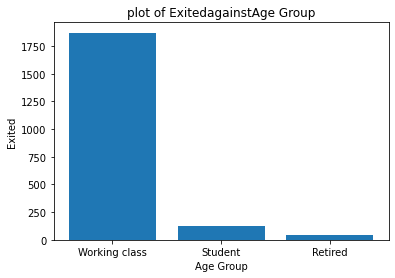

In [138]:
generate_bar_plot(Comb_df_age_group.index, Comb_df_age_group['Exited'], 'Age Group', 'Exited')

In [139]:
Comb_df['HasCrCard'] = Comb_df['HasCrCard'].replace({'Yes': 1, 'No': 0} )
Comb_df_cr_card = Comb_df.groupby('Age Group')[['HasCrCard']].sum()


In [140]:
Comb_df_cr_card = Comb_df_cr_card.sort_values(by='HasCrCard', ascending=False)
Comb_df_cr_card 

,HasCrCard
Age Group,
Working class,4067
Student,837
Retired,244


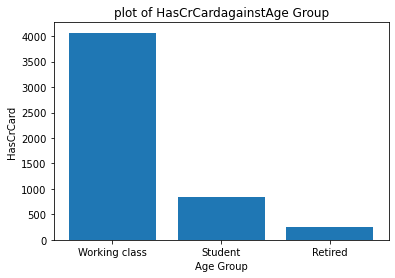

In [141]:
generate_bar_plot(Comb_df_cr_card.index, Comb_df_cr_card['HasCrCard'], 'Age Group', 'HasCrCard')

In [142]:
Comb_df_card_by_country = Comb_df.groupby('Geography')[['HasCrCard']].sum()


In [143]:
Comb_df_card_by_country = Comb_df_card_by_country.sort_values(by='HasCrCard', ascending=False)
Comb_df_card_by_country 

,HasCrCard
Geography,
France,2590
Spain,1311
Germany,1247


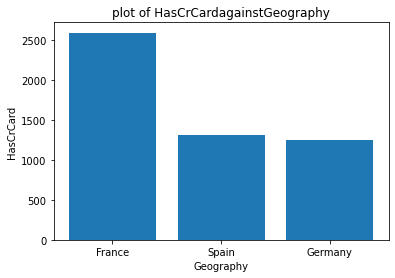

In [144]:
generate_bar_plot(Comb_df_card_by_country.index, Comb_df_card_by_country['HasCrCard'], 'Geography', 'HasCrCard')

In [96]:
counts_Age = Comb_df.groupby(['Geography', 'Age Group']).size().reset_index(name='Count')
counts_Age

,Geography,Age Group,Count
0,France,Retired,141
1,France,Student,866
2,France,Working class,4006
3,Germany,Retired,70
4,Germany,Student,372
5,Germany,Working class,2066
6,Spain,Retired,71
7,Spain,Student,403
8,Spain,Working class,2001


In [97]:
def classify_tenure(tenure):
    if tenure <= 5:
        return 'Short term cust'
    else:
        return 'Long term cust'

Comb_df['Tenure Group'] = Comb_df['Tenure_x'].apply(classify_tenure)

print(Comb_df)

      CustomerId  Balance  NumOfProducts  HasCrCard  Tenure_x IsActiveMember  \
0       15634602        0              1          1         2            Yes   
2       15619304   159660              3          0         8             No   
3       15701354        0              2          0         1             No   
4       15737888   125510              1          1         2            Yes   
5       15574012   113755              2          0         8             No   
...          ...      ...            ...        ...       ...            ...   
9995    15606229        0              2          0         5             No   
9996    15569892    57369              1          1        10            Yes   
9997    15584532        0              1          1         7            Yes   
9998    15682355    75075              2          0         3             No   
9999    15628319   130142              1          0         4             No   

      Exited       Name  CreditScore Ge

In [98]:
Comb_df

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure_x,IsActiveMember,Exited,Name,CreditScore,Geography,Gender,Age,EstimatedSalary,Age Group,Tenure Group
0,15634602,0,1,1,2,Yes,1,Hargrave,619,France,Female,42,101348,Working class,Short term cust
2,15619304,159660,3,0,8,No,1,Onio,502,France,Female,42,113931,Working class,Long term cust
3,15701354,0,2,0,1,No,0,Boni,699,France,Female,39,93826,Working class,Short term cust
4,15737888,125510,1,1,2,Yes,0,Mitchell,850,Spain,Female,43,79084,Working class,Short term cust
5,15574012,113755,2,0,8,No,1,Chu,645,Spain,Male,44,149756,Working class,Long term cust
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,0,2,0,5,No,0,Obijiaku,771,France,Male,39,96270,Working class,Short term cust
9996,15569892,57369,1,1,10,Yes,0,Johnstone,516,France,Male,35,101699,Working class,Long term cust
9997,15584532,0,1,1,7,Yes,1,Liu,709,France,Female,36,42085,Working class,Long term cust
9998,15682355,75075,2,0,3,No,1,Sabbatini,772,Germany,Male,42,92888,Working class,Short term cust


In [145]:
Comb_df_Tenure = Comb_df.groupby('Tenure Group')[['Exited']].sum()


In [150]:
Comb_df_Tenure = Comb_df_Tenure.sort_values(by='Exited', ascending=False)
Comb_df_Tenure

,Exited
Tenure Group,
Short term cust,1153
Long term cust,884


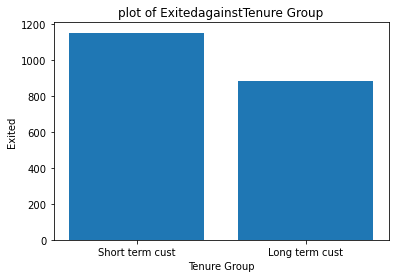

In [149]:
generate_bar_plot(Comb_df_Tenure.index, Comb_df_Tenure['Exited'], 'Tenure Group', 'Exited')

In [100]:
counts_Gender = Comb_df.groupby(['Geography', 'Gender']).size().reset_index(name='Count')
counts_Gender

,Geography,Gender,Count
0,France,Female,2260
1,France,Male,2753
2,Germany,Female,1192
3,Germany,Male,1316
4,Spain,Female,1088
5,Spain,Male,1387


In [101]:
Comb_df_credit = Comb_df.groupby('Gender')[['CreditScore']].sum()
Comb_df_credit

,CreditScore
Gender,
Female,2955007
Male,3547887


In [102]:
Comb_df_Gender_Exit = Comb_df.groupby('Gender')[['Exited']].sum()
Comb_df_Gender_Exit

,Exited
Gender,
Female,1139
Male,898


In [103]:
Comb_df['IsActiveMember'] = Comb_df['IsActiveMember'].replace({'Yes': 1, 'No': 0} )

In [104]:
Comb_df_ActiveMember = Comb_df.groupby('Gender')[['IsActiveMember']].sum()
Comb_df_ActiveMember 

,IsActiveMember
Gender,
Female,2281
Male,2867


In [105]:
Comb_df_Active_exited = Comb_df.groupby('IsActiveMember')[['Exited']].sum()
Comb_df_Active_exited

,Exited
IsActiveMember,
0,1302
1,735


In [106]:
Comb_df_product_exited = Comb_df.groupby('NumOfProducts')[['Exited']].sum()
Comb_df_product_exited

,Exited
NumOfProducts,
1,1409
2,348
3,220
4,60


In [107]:
max_salary = Comb_df['EstimatedSalary'].max()
max_salary

199992

In [151]:
max_CreditScore = Comb_df['CreditScore'].max()
max_CreditScore

850

In [108]:
max_bal = Comb_df['Balance'].max()
max_bal

250898

In [109]:
def classify_salary(salary):
    if salary >= 99992:
        return 'High earner'
    elif salary >= 49992 :
        return 'Fair earner'
    else:
        return 'low earner'

Comb_df['Salary Group'] = Comb_df['EstimatedSalary'].apply(classify_salary)

print(Comb_df)

      CustomerId  Balance  NumOfProducts  HasCrCard  Tenure_x  IsActiveMember  \
0       15634602        0              1          1         2               1   
2       15619304   159660              3          0         8               0   
3       15701354        0              2          0         1               0   
4       15737888   125510              1          1         2               1   
5       15574012   113755              2          0         8               0   
...          ...      ...            ...        ...       ...             ...   
9995    15606229        0              2          0         5               0   
9996    15569892    57369              1          1        10               1   
9997    15584532        0              1          1         7               1   
9998    15682355    75075              2          0         3               0   
9999    15628319   130142              1          0         4               0   

      Exited       Name  Cr

In [112]:
Comb_df.head(20)

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure_x,IsActiveMember,Exited,Name,CreditScore,Geography,Gender,Age,EstimatedSalary,Age Group,Tenure Group,Salary Group
0,15634602,0,1,1,2,1,1,Hargrave,619,France,Female,42,101348,Working class,Short term cust,High earner
2,15619304,159660,3,0,8,0,1,Onio,502,France,Female,42,113931,Working class,Long term cust,High earner
3,15701354,0,2,0,1,0,0,Boni,699,France,Female,39,93826,Working class,Short term cust,Fair earner
4,15737888,125510,1,1,2,1,0,Mitchell,850,Spain,Female,43,79084,Working class,Short term cust,Fair earner
5,15574012,113755,2,0,8,0,1,Chu,645,Spain,Male,44,149756,Working class,Long term cust,High earner
6,15592531,0,2,1,7,1,0,Bartlett,822,France,Male,50,10062,Working class,Long term cust,low earner
7,15656148,115046,4,0,4,0,1,Obinna,376,Germany,Female,29,119346,Student,Short term cust,High earner
8,15792365,142051,2,1,4,1,0,He,501,France,Male,44,74940,Working class,Short term cust,Fair earner
9,15592389,134603,1,1,2,1,0,H?,684,France,Male,27,71725,Student,Short term cust,Fair earner
10,15767821,102016,2,0,6,0,0,Bearce,528,France,Male,31,80181,Working class,Long term cust,Fair earner


In [111]:
Comb_df_earners_exited = Comb_df.groupby('Salary Group')[['Exited']].sum()
Comb_df_earners_exited

,Exited
Salary Group,
Fair earner,504
High earner,1044
low earner,489


In [115]:
def classify_balance(balance):
    if balance >= 250898:
        return 'High balance'
    elif balance >= 150898 :
        return 'Fair balance'
    elif balance >= 50898 :
        return 'low balance'
    else:
        return 'Very low balance'

Comb_df['Balance Group'] = Comb_df['Balance'].apply(classify_balance)

print(Comb_df)

      CustomerId  Balance  NumOfProducts  HasCrCard  Tenure_x  IsActiveMember  \
0       15634602        0              1          1         2               1   
2       15619304   159660              3          0         8               0   
3       15701354        0              2          0         1               0   
4       15737888   125510              1          1         2               1   
5       15574012   113755              2          0         8               0   
...          ...      ...            ...        ...       ...             ...   
9995    15606229        0              2          0         5               0   
9996    15569892    57369              1          1        10               1   
9997    15584532        0              1          1         7               1   
9998    15682355    75075              2          0         3               0   
9999    15628319   130142              1          0         4               0   

      Exited       Name  Cr

In [116]:
Comb_df

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure_x,IsActiveMember,Exited,Name,CreditScore,Geography,Gender,Age,EstimatedSalary,Age Group,Tenure Group,Salary Group,Balance Group
0,15634602,0,1,1,2,1,1,Hargrave,619,France,Female,42,101348,Working class,Short term cust,High earner,Very low balance
2,15619304,159660,3,0,8,0,1,Onio,502,France,Female,42,113931,Working class,Long term cust,High earner,Fair balance
3,15701354,0,2,0,1,0,0,Boni,699,France,Female,39,93826,Working class,Short term cust,Fair earner,Very low balance
4,15737888,125510,1,1,2,1,0,Mitchell,850,Spain,Female,43,79084,Working class,Short term cust,Fair earner,low balance
5,15574012,113755,2,0,8,0,1,Chu,645,Spain,Male,44,149756,Working class,Long term cust,High earner,low balance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,0,2,0,5,0,0,Obijiaku,771,France,Male,39,96270,Working class,Short term cust,Fair earner,Very low balance
9996,15569892,57369,1,1,10,1,0,Johnstone,516,France,Male,35,101699,Working class,Long term cust,High earner,low balance
9997,15584532,0,1,1,7,1,1,Liu,709,France,Female,36,42085,Working class,Long term cust,low earner,Very low balance
9998,15682355,75075,2,0,3,0,1,Sabbatini,772,Germany,Male,42,92888,Working class,Short term cust,Fair earner,low balance


In [153]:
def classify_CreditScore(CreditScore):
    if CreditScore >= 650:
        return 'High score'
    elif CreditScore >= 450 :
        return 'Good score'
    else:
        return 'low score'

Comb_df['Credit score Group'] = Comb_df['CreditScore'].apply(classify_CreditScore)

print(Comb_df)

      CustomerId  Balance  NumOfProducts  HasCrCard  Tenure_x  IsActiveMember  \
0       15634602        0              1          1         2               1   
2       15619304   159660              3          0         8               0   
3       15701354        0              2          0         1               0   
4       15737888   125510              1          1         2               1   
5       15574012   113755              2          0         8               0   
...          ...      ...            ...        ...       ...             ...   
9995    15606229        0              2          0         5               0   
9996    15569892    57369              1          1        10               1   
9997    15584532        0              1          1         7               1   
9998    15682355    75075              2          0         3               0   
9999    15628319   130142              1          0         4               0   

      Exited  CreditScore G

In [156]:
Comb_df.head(30)

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure_x,IsActiveMember,Exited,CreditScore,Geography,Gender,Age,EstimatedSalary,Age Group,Tenure Group,Salary Group,Balance Group,Credit score Group
0,15634602,0,1,1,2,1,1,619,France,Female,42,101348,Working class,Short term cust,High earner,Very low balance,Good score
2,15619304,159660,3,0,8,0,1,502,France,Female,42,113931,Working class,Long term cust,High earner,Fair balance,Good score
3,15701354,0,2,0,1,0,0,699,France,Female,39,93826,Working class,Short term cust,Fair earner,Very low balance,High score
4,15737888,125510,1,1,2,1,0,850,Spain,Female,43,79084,Working class,Short term cust,Fair earner,low balance,High score
5,15574012,113755,2,0,8,0,1,645,Spain,Male,44,149756,Working class,Long term cust,High earner,low balance,Good score
6,15592531,0,2,1,7,1,0,822,France,Male,50,10062,Working class,Long term cust,low earner,Very low balance,High score
7,15656148,115046,4,0,4,0,1,376,Germany,Female,29,119346,Student,Short term cust,High earner,low balance,low score
8,15792365,142051,2,1,4,1,0,501,France,Male,44,74940,Working class,Short term cust,Fair earner,low balance,Good score
9,15592389,134603,1,1,2,1,0,684,France,Male,27,71725,Student,Short term cust,Fair earner,low balance,High score
10,15767821,102016,2,0,6,0,0,528,France,Male,31,80181,Working class,Long term cust,Fair earner,low balance,Good score


In [155]:
Comb_df_credit_score = Comb_df.groupby('Credit score Group')[['Exited']].sum()
Comb_df_credit_score

,Exited
Credit score Group,
Good score,988
High score,988
low score,61


In [162]:
counts_credit_score = Comb_df.groupby(['Credit score Group', 'Age Group']).size().reset_index(name='Count')
counts_credit_score

,Credit score Group,Age Group,Count
0,Good score,Retired,120
1,Good score,Student,776
2,Good score,Working class,3816
3,High score,Retired,158
4,High score,Student,842
5,High score,Working class,4099
6,low score,Retired,4
7,low score,Student,23
8,low score,Working class,158


In [168]:
Comb_df_balance_exited = Comb_df.groupby('Balance Group')[['Exited']].sum()


In [167]:
Comb_df_balance_exited  = Comb_df_balance_exited .sort_values(by='Exited', ascending=False)
Comb_df_balance_exited 

,Exited
Balance Group,
low balance,1297
Very low balance,526
Fair balance,213
High balance,1


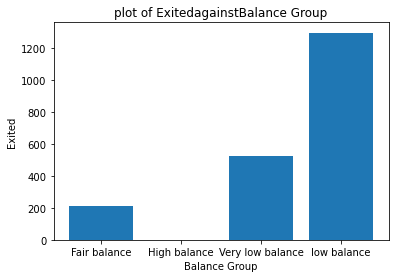

In [169]:
generate_bar_plot(Comb_df_balance_exited.index, Comb_df_balance_exited['Exited'], 'Balance Group', 'Exited')

In [170]:
counts_trend = Comb_df.groupby(['Salary Group', 'Balance Group']).size().reset_index(name='Count')
counts_trend

,Salary Group,Balance Group,Count
0,Fair earner,Fair balance,220
1,Fair earner,High balance,1
2,Fair earner,Very low balance,943
3,Fair earner,low balance,1372
4,High earner,Fair balance,471
5,High earner,Very low balance,1819
6,High earner,low balance,2717
7,low earner,Fair balance,237
8,low earner,Very low balance,931
9,low earner,low balance,1285


Most high earners have very low account compared to other group of earners this shows this account is not a savings account for them, mainly salary account, so when they changed jobs they'll probably shut down the account or become inactive


In [171]:
Comb_df_earners_active = Comb_df.groupby('Salary Group')[['IsActiveMember']].sum()
Comb_df_earners_active

,IsActiveMember
Salary Group,
Fair earner,1311
High earner,2565
low earner,1272


In [121]:
Comb_df_active_exited = Comb_df.groupby('IsActiveMember')[['Exited']].sum()
Comb_df_active_exited

,Exited
IsActiveMember,
0,1302
1,735


We have active members who have exited the bank

In [127]:
Comb_df.drop(columns=['Name'], inplace=True)

In [128]:
cat_columns = [col for col in Comb_df.select_dtypes('object')]

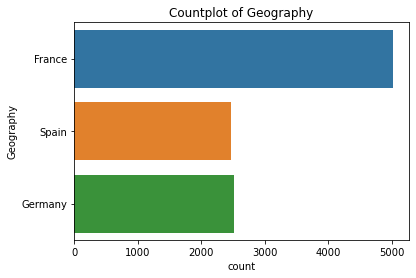

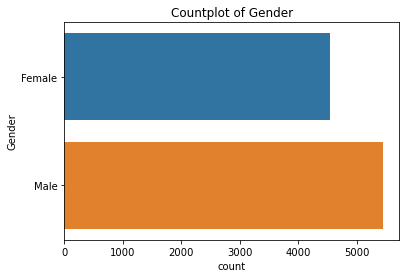

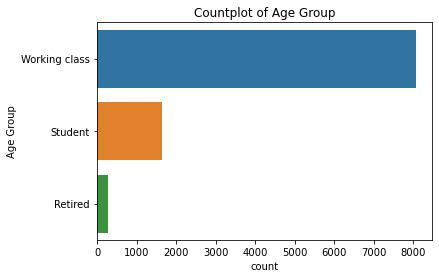

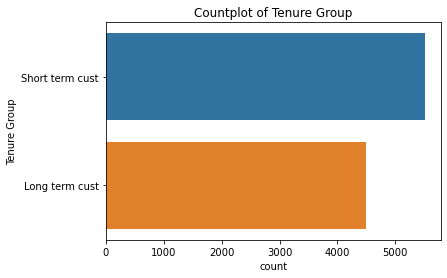

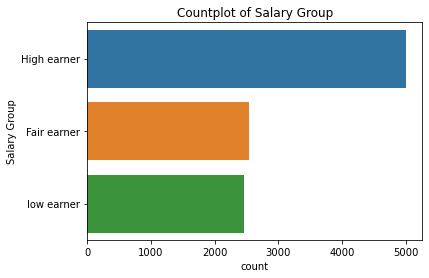

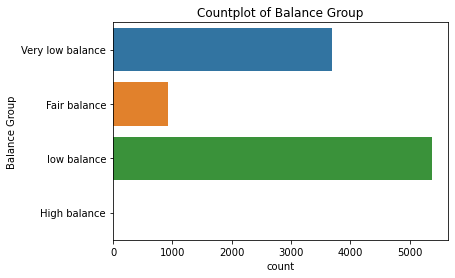

In [129]:
for col in cat_columns:
    sb.countplot(y=col,data=Comb_df)
    plt.title(f'Countplot of {col}')
    plt.show()

In [130]:
Comb_df.describe()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure_x,IsActiveMember,Exited,CreditScore,Age,EstimatedSalary
count,9.996000e+03,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.00000,9996.000000,9996.000000
mean,1.569095e+07,76481.629252,1.530412,0.515006,5.013605,0.515006,0.203782,650.54962,38.921869,100090.485694
std,7.193671e+04,62400.032932,0.581674,0.499800,2.892231,0.499800,0.402829,96.66183,10.489576,57521.516409
min,1.556570e+07,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,350.00000,18.000000,11.000000
25%,1.562853e+07,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,584.00000,32.000000,50973.500000
50%,1.569074e+07,97198.000000,1.000000,1.000000,5.000000,1.000000,0.000000,652.00000,37.000000,100218.000000
75%,1.575323e+07,127643.750000,2.000000,1.000000,7.250000,1.000000,0.000000,718.00000,44.000000,149399.500000
max,1.581569e+07,250898.000000,4.000000,1.000000,10.000000,1.000000,1.000000,850.00000,92.000000,199992.000000


In [179]:
Comb_df.to_csv('Cleaned_Data.csv')